In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!cp '/content/gdrive/MyDrive/Dataset/archive.zip' data

In [ ]:
!unzip /content/data

In [ ]:
train_data_dir = '/content/Rock-Paper-Scissors/train/'
validation_data_dir = '/content/Rock-Paper-Scissors/test/'

In [ ]:
import os
for class_ in os.listdir(train_data_dir) :
  print(class_)
  cnt = 0
  for img in os.listdir(train_data_dir + class_):
    cnt = cnt + 1
  print(cnt)
print("Test")
for class_ in os.listdir(validation_data_dir) :
  print(class_)
  cnt = 0
  for img in os.listdir(validation_data_dir + class_):
    cnt = cnt + 1
  print(cnt)

rock
840
scissors
840
paper
840
Test
rock
124
scissors
124
paper
124


In [ ]:
base_dir = "/content/Rock-Paper-Scissors/"

# Train set
train_dir = os.path.join(base_dir + "train/")
print("Train set --> ", os.listdir(train_dir))

# Test set
test_dir = os.path.join(base_dir + "test/")
print("Test set --> ", os.listdir(test_dir))

# Validation set
validation_dir = os.path.join(base_dir + "validation/")
print("Validation set --> ", os.listdir(validation_dir)[:3])


Train set -->  ['rock', 'scissors', 'paper']
Test set -->  ['rock', 'scissors', 'paper']
Validation set -->  ['paper7.png', 'rock7.png', 'rock9.png']


In [ ]:
import tensorflow as tf
tf.__version__
#'2.3.0'


'2.8.0'

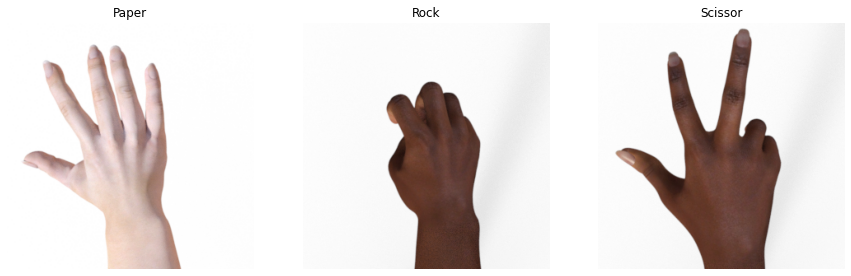

In [ ]:
import matplotlib.pyplot as plt
import random
from keras.preprocessing import image

fig, ax = plt.subplots(1, 3, figsize=(15, 10))

sample_paper = random.choice(os.listdir(train_dir + "paper"))
img = image.load_img(train_dir + "paper/" + sample_paper)
ax[0].imshow(img)
ax[0].set_title("Paper")
ax[0].axis("Off")

sample_rock = random.choice(os.listdir(train_dir + "rock"))
img = image.load_img(train_dir + "rock/" + sample_rock)
ax[1].imshow(img)
ax[1].set_title("Rock")
ax[1].axis("Off")

sample_scissor = random.choice(os.listdir(train_dir + "scissors"))
img = image.load_img(train_dir + "scissors/" + sample_scissor)
ax[2].imshow(img)
ax[2].set_title("Scissor")
ax[2].axis("Off")

plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from matplotlib import pyplot as plt

In [ ]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached >95% accuracy so cancelling training!")
            self.model.stop_training = True
        
callbacks = myCallback()

Without Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)


Found 2520 images belonging to 3 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)


Found 372 images belonging to 3 classes.


In [ ]:
import numpy as np
history = model.fit_generator(
      train_generator,
      steps_per_epoch = np.ceil(2520/20),  # 2520 images = batch_size * steps
      epochs = 5,
      validation_data=validation_generator,
      validation_steps = np.ceil(372/20),  # 372 images = batch_size * steps
      verbose = 2)


Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


126/126 - 13s - loss: 0.3801 - accuracy: 0.8282 - val_loss: 0.6990 - val_accuracy: 0.7043 - 13s/epoch - 103ms/step
Epoch 2/5
126/126 - 12s - loss: 0.0281 - accuracy: 0.9944 - val_loss: 0.4318 - val_accuracy: 0.8333 - 12s/epoch - 97ms/step
Epoch 3/5
126/126 - 13s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6247 - val_accuracy: 0.8495 - 13s/epoch - 105ms/step
Epoch 4/5
126/126 - 12s - loss: 5.0679e-04 - accuracy: 1.0000 - val_loss: 0.4112 - val_accuracy: 0.8656 - 12s/epoch - 95ms/step
Epoch 5/5
126/126 - 12s - loss: 4.3258e-05 - accuracy: 1.0000 - val_loss: 0.4440 - val_accuracy: 0.8710 - 12s/epoch - 95ms/step


In [ ]:
model.save('/content/gdrive/MyDrive/woaug')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/woaug/assets


In [ ]:
from tensorflow import keras

model_wo_aug = keras.models.load_model('/content/gdrive/MyDrive/woaug')


Found 33 validated image filenames.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


              precision    recall  f1-score   support

       paper       0.77      0.91      0.83        11
        rock       1.00      1.00      1.00        11
    scissors       0.89      0.73      0.80        11

    accuracy                           0.88        33
   macro avg       0.89      0.88      0.88        33
weighted avg       0.89      0.88      0.88        33



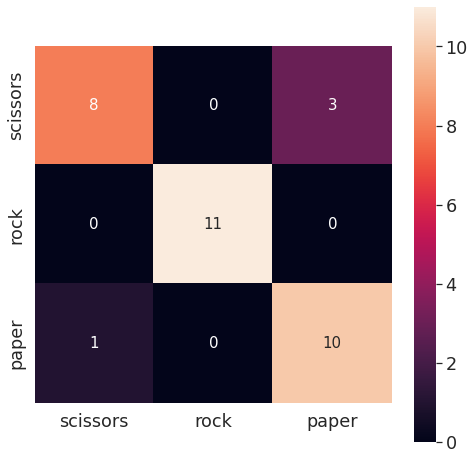

,precision,recall,f1-score,support
paper,0.769231,0.909091,0.833333,11.000000
rock,1.000000,1.000000,1.000000,11.000000
scissors,0.888889,0.727273,0.800000,11.000000
accuracy,0.878788,0.878788,0.878788,0.878788
macro avg,0.886040,0.878788,0.877778,33.000000
weighted avg,0.886040,0.878788,0.877778,33.000000


In [ ]:
test_img = os.listdir(os.path.join(validation_dir))

test_df = pd.DataFrame({'Image': test_img})
test_df.head()
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    validation_dir, 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150, 150),
    batch_size = 20,
    shuffle = False
)
predict = model.predict_generator(test_generator, steps = int(np.ceil(33/20)))
# Identifying the classes

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['Label'] = np.argmax(predict, axis = -1) # axis = -1 --> To compute the max element index within list of lists
test_df['Label'] = test_df['Label'].replace(label_map)
actual_labels = []
for ind in test_df.index:
  if('paper' in test_df['Image'][ind]):
    actual_labels.append('paper')

  if('rock' in test_df['Image'][ind]):
    actual_labels.append('rock')

  if('scissors' in test_df['Image'][ind]):
    actual_labels.append('scissors')

test_df['Actual'] = actual_labels

print_classification_report(test_df['Label'], test_df['Actual'])

With AUgmentaion

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2, # Shifting image width by 20%
      height_shift_range=0.2,# Shifting image height by 20%
      shear_range=0.2,       # Shearing across X-axis by 20%
      zoom_range=0.2,        # Image zooming by 20%
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)


Found 2520 images belonging to 3 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)


Found 372 images belonging to 3 classes.


In [ ]:

history = model.fit_generator(
      train_generator,
      steps_per_epoch = np.ceil(2520/20),  # 2520 images = batch_size * steps
      epochs = 10,
      validation_data=validation_generator,
      validation_steps = np.ceil(372/20),  # 372 images = batch_size * steps
      callbacks=[callbacks],
      verbose = 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
126/126 - 25s - loss: 1.0247 - accuracy: 0.4452 - val_loss: 0.3434 - val_accuracy: 0.9355 - 25s/epoch - 195ms/step
Epoch 2/10
126/126 - 23s - loss: 0.6063 - accuracy: 0.7298 - val_loss: 0.2725 - val_accuracy: 0.8925 - 23s/epoch - 185ms/step
Epoch 3/10
126/126 - 23s - loss: 0.3082 - accuracy: 0.8841 - val_loss: 0.3133 - val_accuracy: 0.8602 - 23s/epoch - 186ms/step
Epoch 4/10
126/126 - 24s - loss: 0.2450 - accuracy: 0.9012 - val_loss: 0.1671 - val_accuracy: 0.9301 - 24s/epoch - 188ms/step
Epoch 5/10
126/126 - 23s - loss: 0.1668 - accuracy: 0.9373 - val_loss: 0.0966 - val_accuracy: 0.9597 - 23s/epoch - 185ms/step
Epoch 6/10

Reached >95% accuracy so cancelling training!
126/126 - 24s - loss: 0.1276 - accuracy: 0.9595 - val_loss: 0.0392 - val_accuracy: 0.9946 - 24s/epoch - 188ms/step


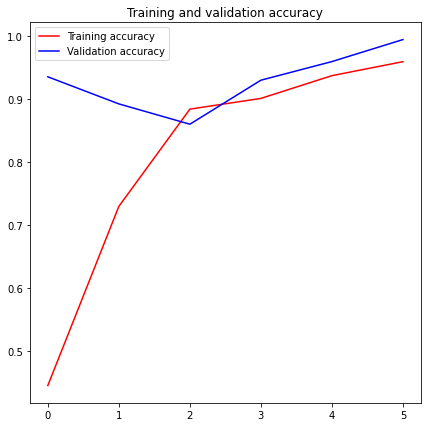

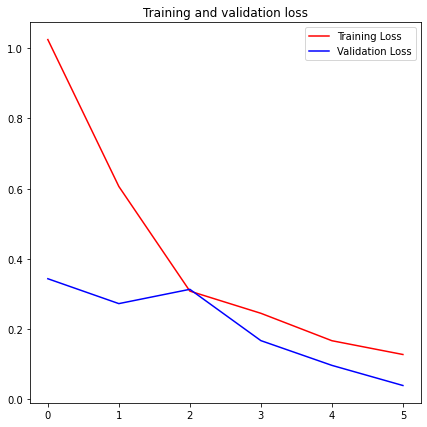

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,7))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,7))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Testing

In [ ]:
test_img = os.listdir(os.path.join(validation_dir))

test_df = pd.DataFrame({'Image': test_img})
test_df.head()


,Image
0,paper7.png
1,rock7.png
2,rock9.png
3,scissors9.png
4,paper-hires1.png


In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    validation_dir, 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150, 150),
    batch_size = 20,
    shuffle = False
)


Found 33 validated image filenames.


In [ ]:
predict = model.predict_generator(test_generator, steps = int(np.ceil(33/20)))
# Identifying the classes

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
print(label_map)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


{0: 'paper', 1: 'rock', 2: 'scissors'}


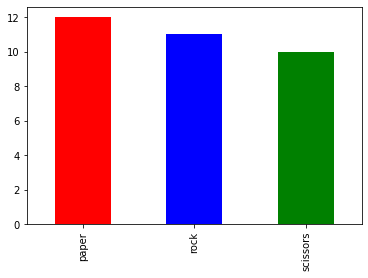

In [ ]:
test_df['Label'] = np.argmax(predict, axis = -1) # axis = -1 --> To compute the max element index within list of lists
test_df['Label'] = test_df['Label'].replace(label_map)
test_df.Label.value_counts().plot.bar(color = ['red','blue','green'])


In [ ]:
lis = []
for ind in test_df.index: 
    if(test_df['Label'][ind] in test_df['Image'][ind]):
        lis.append(1)
    else:
        lis.append(0)
        
print("Accuracy of the model on test data is {:.2f}%".format((sum(lis)/len(lis))*100))


Accuracy of the model on test data is 96.97%


In [ ]:
actual_labels = []
for ind in test_df.index:
  if('paper' in test_df['Image'][ind]):
    actual_labels.append('paper')

  if('rock' in test_df['Image'][ind]):
    actual_labels.append('rock')

  if('scissors' in test_df['Image'][ind]):
    actual_labels.append('scissors')

test_df['Actual'] = actual_labels

              precision    recall  f1-score   support

       paper       0.92      1.00      0.96        11
        rock       1.00      1.00      1.00        11
    scissors       1.00      0.91      0.95        11

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



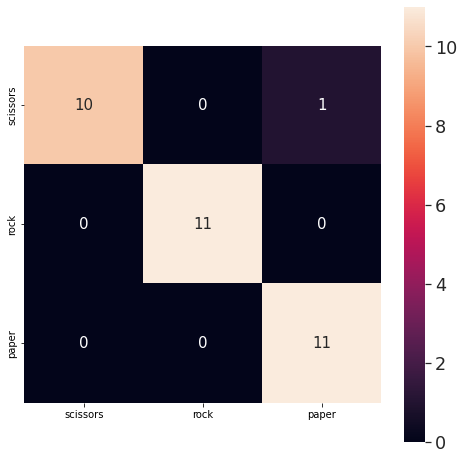

,precision,recall,f1-score,support
paper,0.916667,1.000000,0.956522,11.000000
rock,1.000000,1.000000,1.000000,11.000000
scissors,1.000000,0.909091,0.952381,11.000000
accuracy,0.969697,0.969697,0.969697,0.969697
macro avg,0.972222,0.969697,0.969634,33.000000
weighted avg,0.972222,0.969697,0.969634,33.000000


In [ ]:
print_classification_report(test_df['Label'], test_df['Actual'])

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def print_classification_report(preds, y_test):

    # classification report
    print(classification_report(y_test, preds))
    df = pd.DataFrame(classification_report(y_test, preds,output_dict=True)).transpose()
    fig, ax = plt.subplots(figsize=(8,8)) 

    # color map
    cmap='Blues'
    # cmap = sn.diverging_palette(0, 230, 90, 60, as_cmap=True)

    cm = confusion_matrix(y_test, preds, labels=list(set(y_test)))
    # display(cm)
    df_cm = pd.DataFrame(cm, list(set(y_test)), list(set(y_test)))
    # display(df_cm)
    sn.set(font_scale=1.6)
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, fmt='.4g', ax=ax, square=True)
    plt.show()
    return df
